<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-5 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Convolution Neural Networks </h2> </html>

<html> <h2 style="font-style:italic; color:blue;"> Task 1 : </h2> </html>

#### Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10, Multiple Classes datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

ttps://www.cs.toronto.edu/~kriz/cifar.html

Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

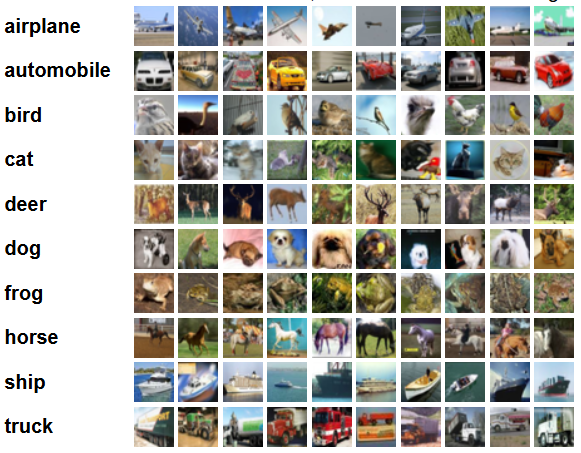

In [3]:
# Your code to import matplotlib, pandas and numpy libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### Following code loads the CIFAR 10 datset.

___________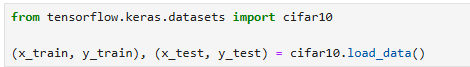

In [4]:
# load cifar10 dataset from tensorflow.keras.dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# Your code to print shapes of training and test data. Check how the data looks
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [6]:
# Your code to print the shape of one image
print('x_train[0] shape:', x_train[0].shape)

x_train[0] shape: (32, 32, 3)


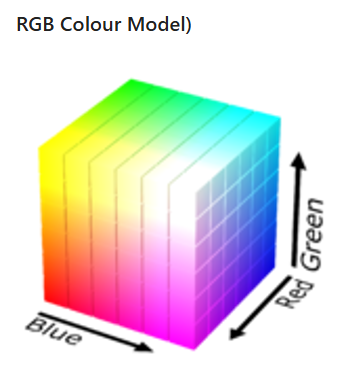

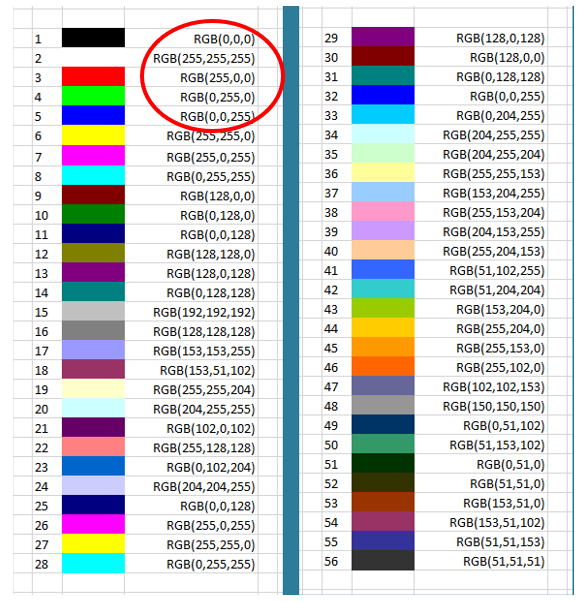

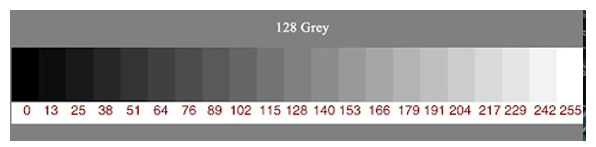

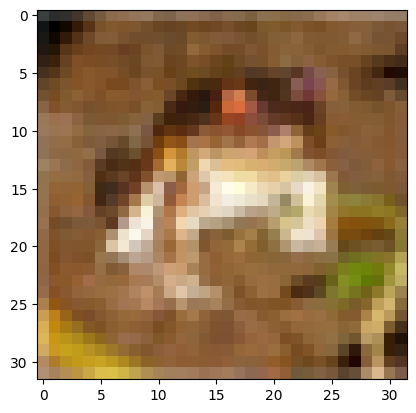

In [7]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[0])

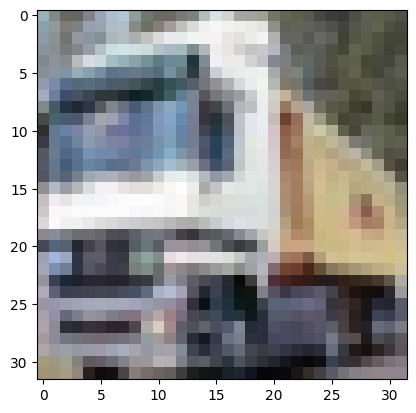

In [8]:
# Show any other image
plt.imshow(x_train[1])

____________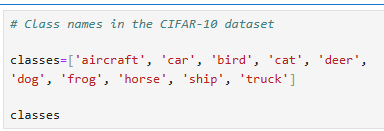

In [9]:
# class name in the CIFAR-10 dataset
class_names = ['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# print classes
print(class_names)

['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


______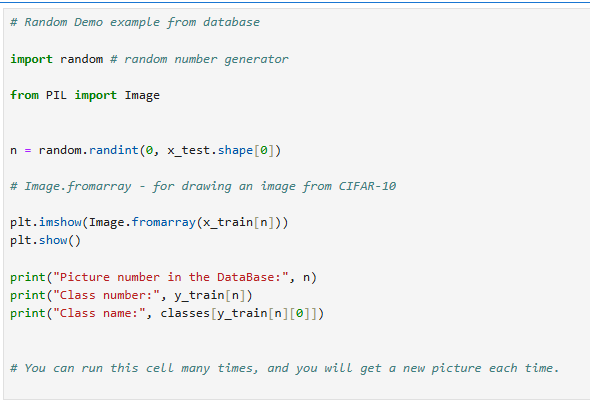

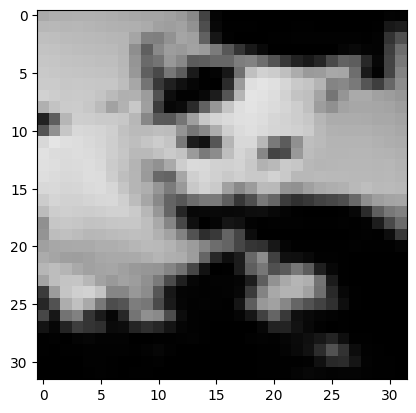

Picture number: 13463
Class number: [3]
Class name: cat


In [10]:
# Random demo example from database

import random
from PIL import Image
import matplotlib.pyplot as plt

n = random.randint(0, x_train.shape[0])

# Image.from array = for drawing an image from CIFAR-10
plt.imshow(Image.fromarray(x_train[n]))
plt.show()

# print picture number in the DataBase, clas number and class name
print('Picture number:', n)
print('Class number:', y_train[n])
print('Class name:', class_names[y_train[n][0]])


## PreProcessing

[[ 61  44  47 ... 132 126 125]
 [ 18   0   8 ...  88  84  88]
 [ 23   7  28 ...  84  84  74]
 ...
 [158 129 128 ... 121  31  35]
 [138 112 120 ... 142  64  56]
 [145 130 136 ... 180 117  95]]


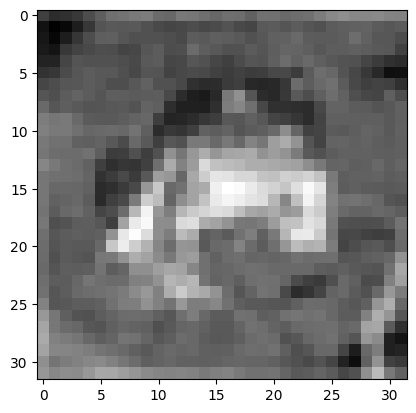

In [11]:
# Your code to print one image in digitals. Check what pixels look like.
# print(x_train[0])
# plt.imshow(x_train[0], cmap=plt.cm.binary)
# plt.show()
# Load the image
image = x_train[0]

# Convert image to grayscale (optional, for simplicity)
image_gray = np.mean(image, axis=2).astype(np.uint8)

# Print the pixel data
print(image_gray)

# Optionally, show the image
plt.imshow(image_gray, cmap='gray')
plt.show()


In [12]:
# Your code to print the shape of any image i.e particular value in the x_train
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])
print(x_train.shape[3])
x_train[3].shape

50000
32
32
3


(32, 32, 3)

In [13]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(x_train.max())

255


____________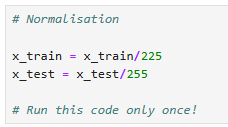

In [14]:
# Normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0

# Your code to print the maximum value in x_train after normalisation. Hint - Use .max()
print(x_train.max())

1.0


__________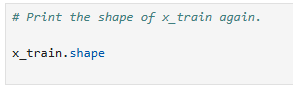

In [15]:
# Print the shape of x_train
print(x_train.shape)

(50000, 32, 32, 3)


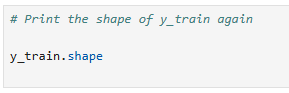

In [16]:
# print the shape of y_train again
y_train.shape

(50000, 1)

## One hot vector encoding.
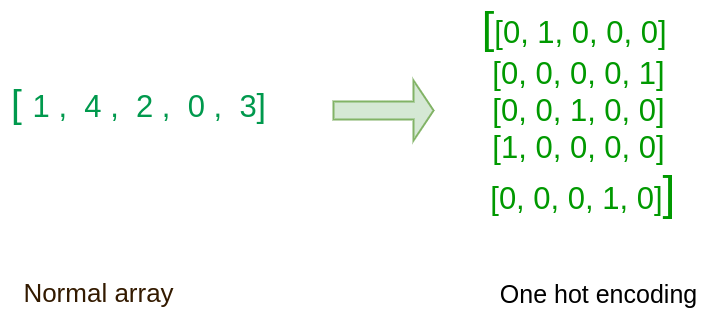


The "to_categorical()" is converting the integer value to binary categorical matrix : https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

________________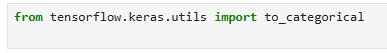

In [17]:
from tensorflow.keras.utils import to_categorical

___________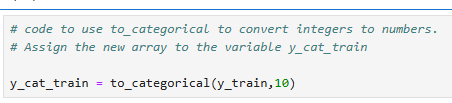

In [18]:
y_cat_train = to_categorical(y_train, 10)

In [19]:
# Your code to print the shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [20]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

# Compare the result for better understanding of "to_categorical()"
print(y_cat_train[0])
print(y_train[0])


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[6]


In [21]:
# Your code to:
# Convert y_test to the encoded vector in the same manner

# Assign it to the variable y_cat_test

#  y_cat_test = ...
y_cat_test = to_categorical(y_test, 10)

____________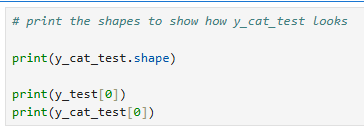

In [22]:
# print the shape to show how y_cat_test looks
print(y_cat_test.shape)
print(y_cat_test[0])
print(y_test[0])

(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[3]


-----------------

## Creating a CNN Model

_____________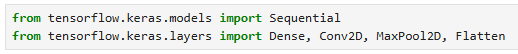

In [23]:
# creating a CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [24]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# Add more convolution and pooling layers with your choice of filters, strides, and activation function
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', ))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# Add a few dense layers.
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# model.summary()


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


__________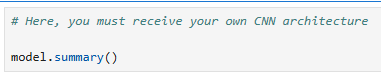

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,626 (217.29 KB)

 Trainable params: 55,626 (217.29 KB)

 Non-trainable params: 0 (0.00 B)

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


___________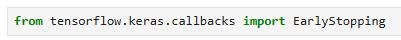

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

__________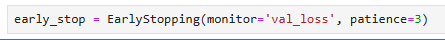

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [28]:
# Your code to compile the models (model.compile). 

# Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# You can use the optimiser of your choice
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [29]:
# Your code to fit the model (model.fit). 

# Use additional parameter -  callbacks = [early_stop] to enable early stopping. 
# Use 'history' array to save the training parameters for each epoch

# history = ....
# history = model.fit(x_train, y_cat_train, epochs=5, validation_data=(x_test, y_cat_test), callbacks=[early_stop])


______________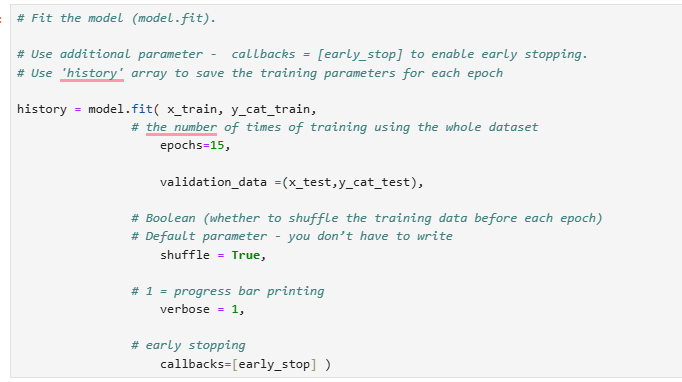

In [30]:
# fit the model (model.fit)

# Use additional parameter - callbacks = [early_stop] to enable early stopiing.
# Use 'hostory' array to save the training parameters for each epoch

history = model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), shuffle=True, verbose=1, callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.3087 - loss: 1.8415 - val_accuracy: 0.5093 - val_loss: 1.3699
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5201 - loss: 1.3443 - val_accuracy: 0.5701 - val_loss: 1.2164
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5873 - loss: 1.1707 - val_accuracy: 0.6073 - val_loss: 1.1212
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6165 - loss: 1.0876 - val_accuracy: 0.6324 - val_loss: 1.0794
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6503 - loss: 0.9926 - val_accuracy: 0.6052 - val_loss: 1.1223
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6668 - loss: 0.9505 - val_accuracy: 0.6436 - val_loss: 1.0416
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6853 - loss: 0.9014 - val_accuracy: 0.6455 - val_loss: 1.0381
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6925 -

##### You can save the model in a file. Following code shows how to do this.

________________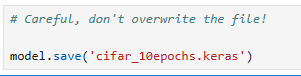

In [31]:
# save the model
model.save('cifar_10epochs.keras')

##### Yiu can save the loss at every step. Following code shows how to do this. 

___________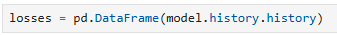

In [32]:
losses = pd.DataFrame(model.history.history)

In [33]:
# You code to print the first few rows of losses.
print(losses[:5])

   accuracy      loss  val_accuracy  val_loss
0   0.39862  1.633710        0.5093  1.369865
1   0.53584  1.299045        0.5701  1.216403
2   0.58888  1.161548        0.6073  1.121153
3   0.62214  1.071691        0.6324  1.079430
4   0.64832  1.001932        0.6052  1.122295


#### Visualise a plot between accuracy vs val_accuracy for all steps.

#### x axis will have the steps (epochs) 
#### y axis will have accuracy and val_accuracy 


_________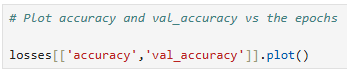

<Axes: >

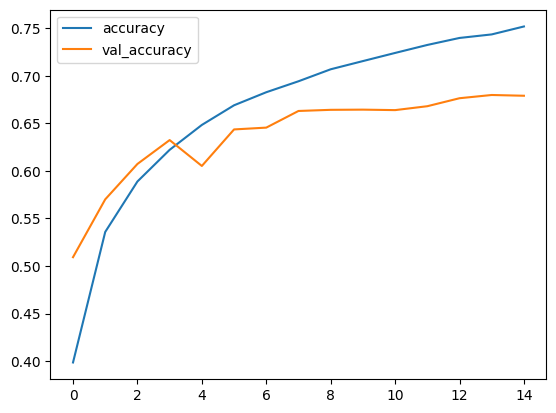

In [34]:
# Plot accuracy and val_accuracy vs the epochs
losses[['accuracy','val_accuracy']].plot()

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

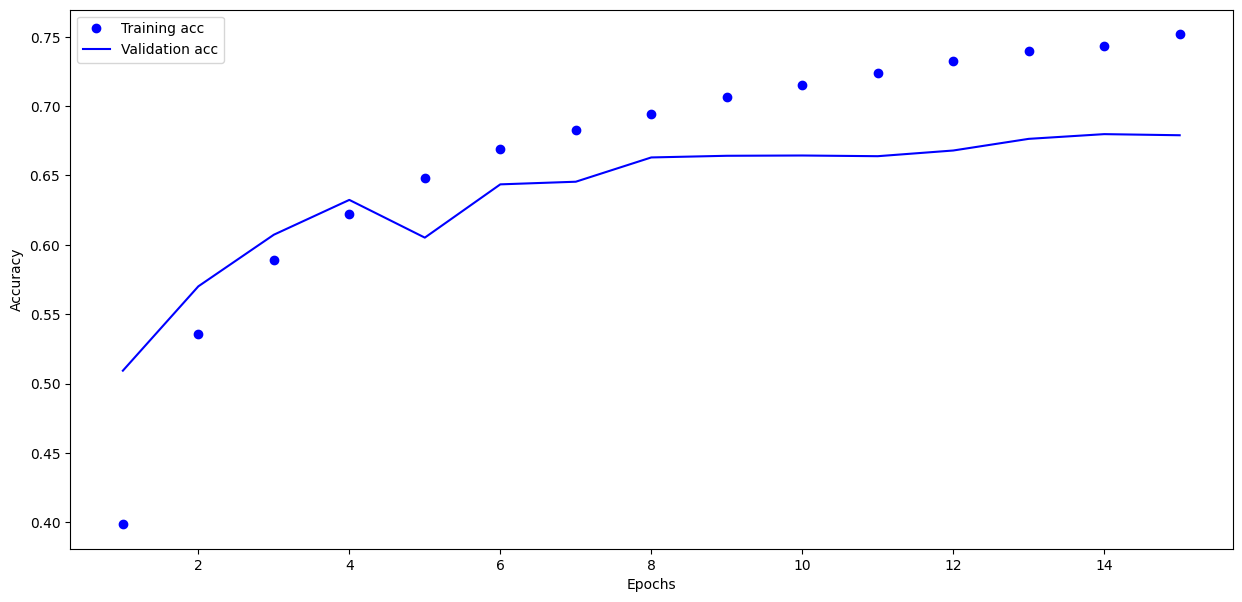

In [35]:
# Plot accuracy and val_accuracy for the neural network training process in more detail

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

__________________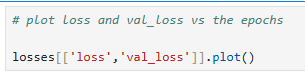

<Axes: >

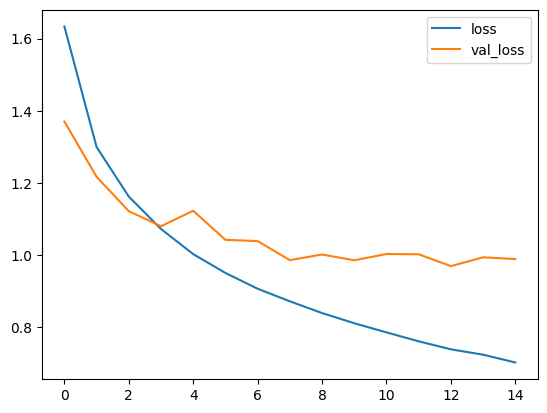

In [36]:
# plot los and val_loss vs the epochs

losses[['loss','val_loss']].plot()

_____________________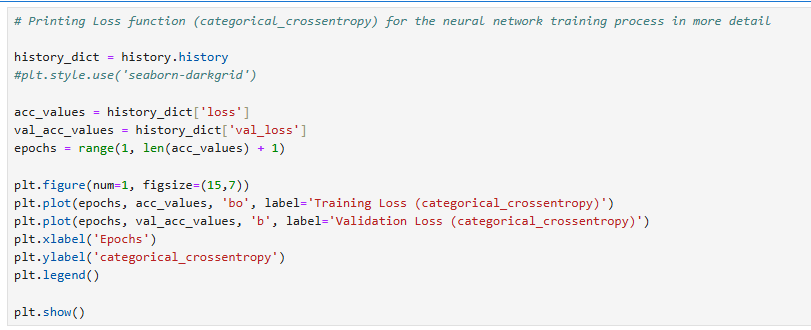

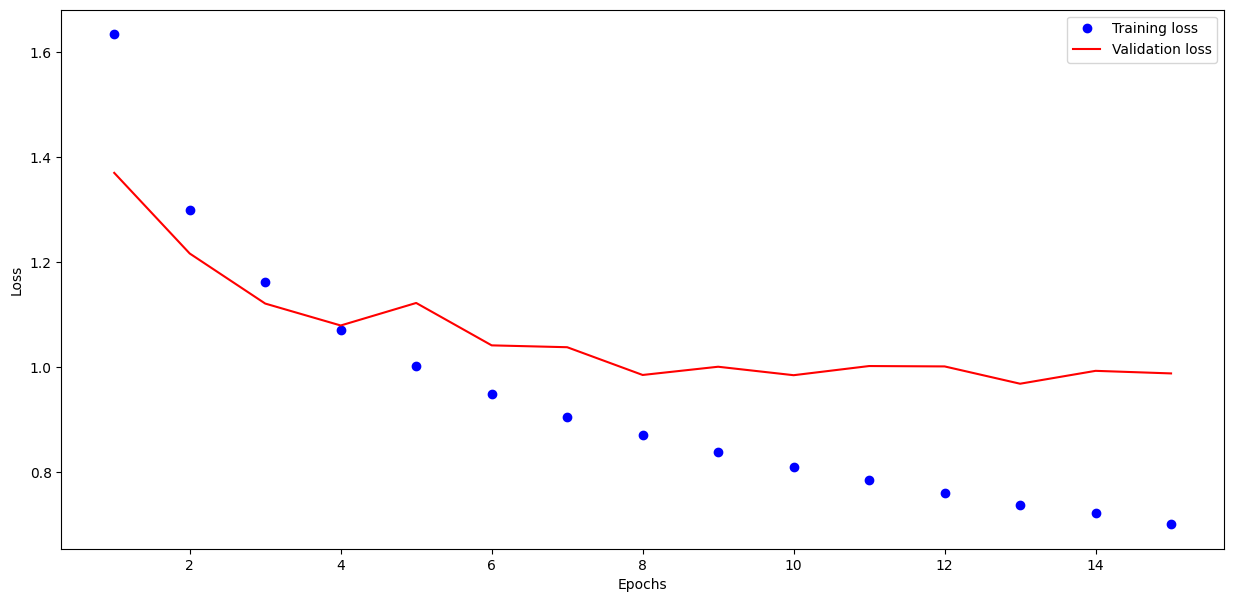

In [37]:
# Printing loss function (categorical_crossentropy) for the neural network training process in the more detail

history_dict = history.history

acc_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=2, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'red', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

__________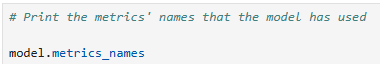

In [38]:
model.metrics_names

['loss', 'compile_metrics']

___________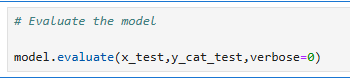

In [39]:
# evaluate the model
model.evaluate(x_test, y_cat_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6843 - loss: 0.9773


[0.9882243871688843, 0.6790000200271606]

In [40]:
# Evaluate the model

model.evaluate(x_test,y_cat_test,verbose=0)

[0.9882243871688843, 0.6790000200271606]

___________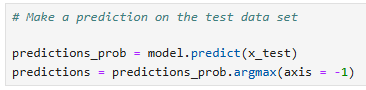

In [41]:
# Make a prediction on the test data set
predictions_prob = model.predict(x_test)  # Predict the probabilities of each class for the test data set
predictions = predictions_prob.argmax(axis = -1)  # Get the index of the class with the highest probability for each sample in the test data set

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [42]:
# Make a prediction on the test data set

predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


_______________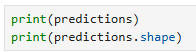

In [43]:
# shape of predictions
predictions.shape

(10000,)

##### You could get the full classification report. 

_____________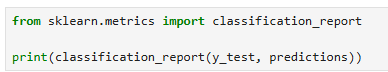

In [44]:
# Classification report
from sklearn.metrics import classification_report

# Print the classification report for the test data and predictions
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1000
           1       0.75      0.86      0.80      1000
           2       0.54      0.57      0.56      1000
           3       0.47      0.58      0.52      1000
           4       0.69      0.49      0.58      1000
           5       0.65      0.55      0.60      1000
           6       0.70      0.81      0.75      1000
           7       0.78      0.67      0.72      1000
           8       0.75      0.81      0.78      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1000
           1       0.75      0.86      0.80      1000
           2       0.54      0.57      0.56      1000
           3       0.47      0.58      0.52      1000
           4       0.69      0.49      0.58      1000
           5       0.65      0.55      0.60      1000
           6       0.70      0.81      0.75      1000
           7       0.78      0.67      0.72      1000
           8       0.75      0.81      0.78      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



##### You could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

______________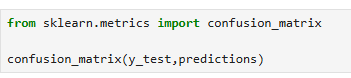

In [46]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[650,  48,  61,  24,  13,   5,  12,  13, 115,  59],
       [ 15, 857,   5,  12,   1,   2,   7,   3,  36,  62],
       [ 69,   9, 574,  97,  48,  54,  89,  23,  23,  14],
       [ 15,  23,  56, 576,  41, 132,  85,  31,  17,  24],
       [ 24,  10, 162, 107, 493,  22,  90,  67,  19,   6],
       [  9,   8,  71, 221,  38, 552,  36,  38,  13,  14],
       [ 10,  15,  53,  55,  18,  15, 813,   6,  10,   5],
       [ 10,  11,  56,  86,  57,  52,  12, 672,   6,  38],
       [ 46,  49,  15,  18,   3,   6,   9,   4, 815,  35],
       [ 16, 110,  11,  19,   2,   3,  10,   5,  36, 788]])

_______________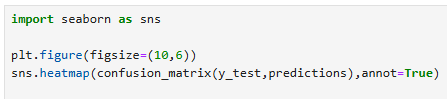

<Axes: >

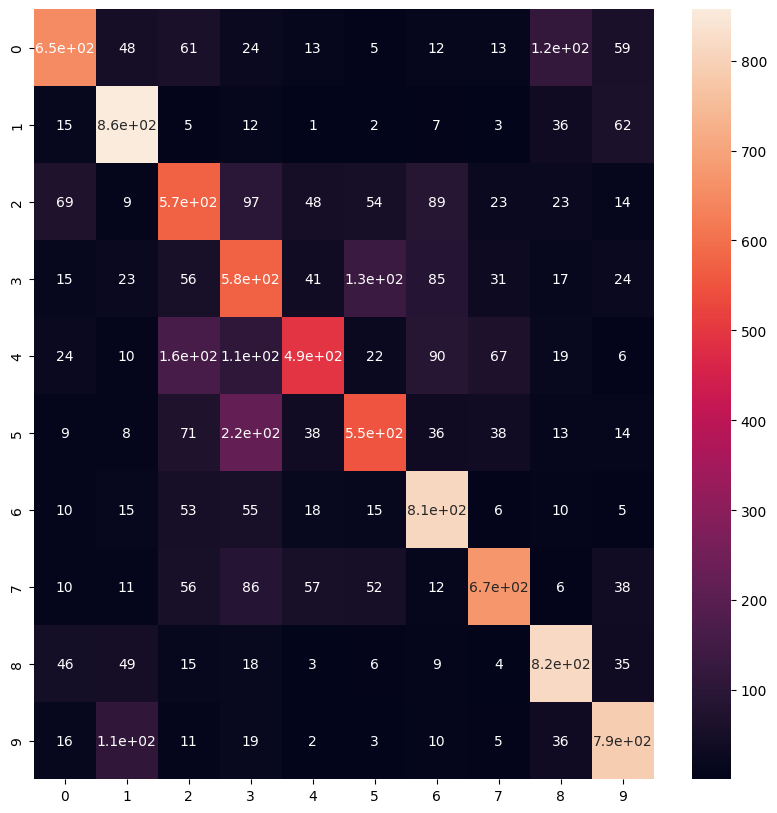

In [47]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Following code makes a prediction on specific image.

____________________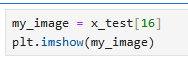

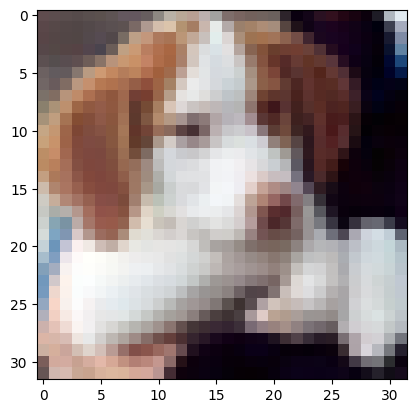

In [48]:
my_image = x_test[16]
plt.imshow(my_image)

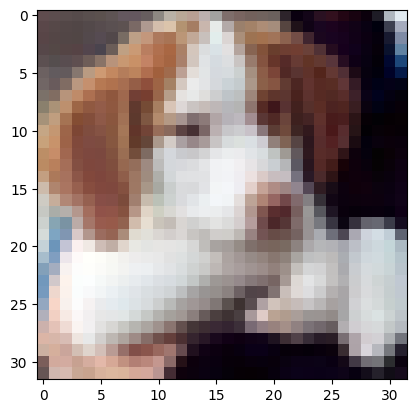

In [49]:
my_image = x_test[16]
plt.imshow(my_image)

______________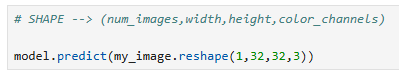

In [50]:
model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[7.3236379e-06, 2.1014415e-04, 3.7480987e-04, 4.4368338e-02,
        6.5740196e-06, 9.5403504e-01, 1.0056801e-04, 3.5785255e-04,
        5.1904717e-05, 4.8752440e-04]], dtype=float32)

In [51]:
# Find the highest probability value in the vector above. 
# What output value does it point to?
# What is the corresponding class label for this output node?

# vector = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# print(np.argmax(vector))
# print(class_names[np.argmax(vector)])

prediction = np.argmax(model.predict(my_image.reshape(1,32,32,3)))
print(prediction)
print("Class name:", classes[predictions[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
5
Class name: cat


_______________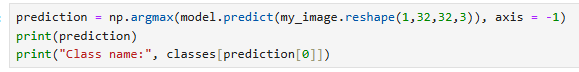

In [52]:
prediction = np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)
print(prediction)
print("Class name:", classes[predictions[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[5]
Class name: cat


### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


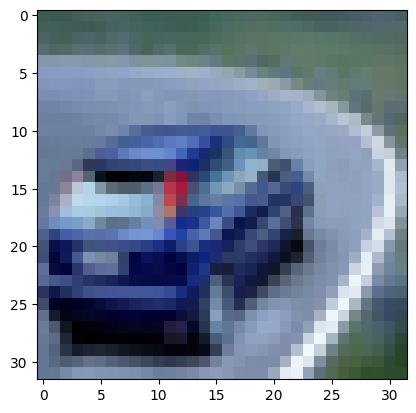

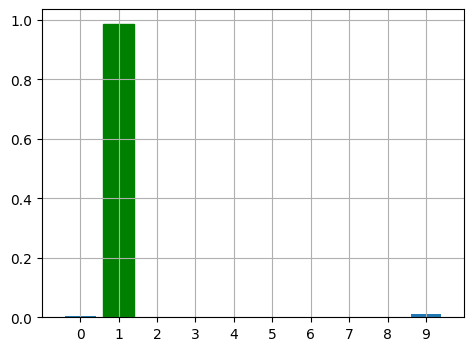

The predicted answer: car 
 Correct answer: car
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [53]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,
# which this neural network will recognise with the probability indicated on the graph.

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the model's summary

### 2. Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.

### 3. Based on this analysis, determine the optimal number of epochs for training your model. 

<html> <h2 style="font-style:italic; color:blue;"> Task 2 (Optional): </h2> </html>

#### Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [54]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_1 (MaxPooling2D)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 16, 16, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_2 (MaxPooling2D)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv2D)                 │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_3 (BatchNormalization)       │ (None, 8, 8, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_3 (MaxPooling2D)           │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_128 (Dense)               │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_4 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

ValueError: 'darkpurple' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

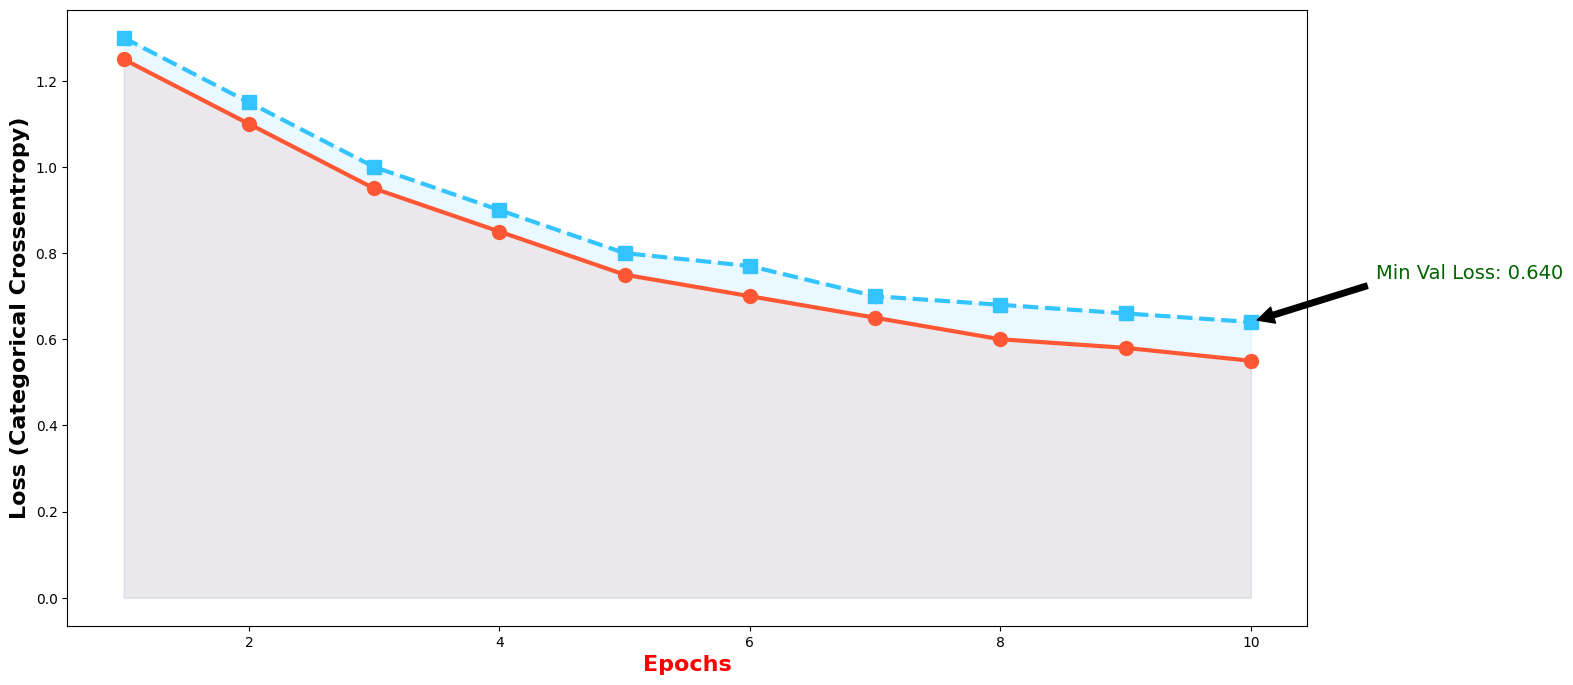

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# --------------------------
# Unique Enhanced CNN Architecture for CIFAR-10
# --------------------------
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3), name="Conv_1"),
    BatchNormalization(name="BN_1"),
    MaxPool2D((2,2), name="Pool_1"),
    Dropout(0.25, name="Dropout_1"),
    
    # Second Convolutional Block
    Conv2D(64, (3,3), activation='relu', padding='same', name="Conv_2"),
    BatchNormalization(name="BN_2"),
    MaxPool2D((2,2), name="Pool_2"),
    Dropout(0.25, name="Dropout_2"),
    
    # Third Convolutional Block
    Conv2D(128, (3,3), activation='relu', padding='same', name="Conv_3"),
    BatchNormalization(name="BN_3"),
    MaxPool2D((2,2), name="Pool_3"),
    Dropout(0.25, name="Dropout_3"),
    
    # Flatten and Fully Connected Layers
    Flatten(name="Flatten"),
    Dense(128, activation='relu', name="Dense_128"),
    BatchNormalization(name="BN_4"),
    Dropout(0.5, name="Dropout_4"),
    Dense(10, activation='softmax', name="Output")
])

model.summary()

# --------------------------
# Advanced Loss Visualization Code
# --------------------------
# Assuming the model has been trained and 'history' object is available from model.fit(),
# here we simulate a sample history for demonstration purposes:
# Remove the dummy history below when using the real history from training.
dummy_history = {
    'loss':      [1.25, 1.10, 0.95, 0.85, 0.75, 0.70, 0.65, 0.60, 0.58, 0.55],
    'val_loss':  [1.30, 1.15, 1.00, 0.90, 0.80, 0.77, 0.70, 0.68, 0.66, 0.64]
}
epochs = range(1, len(dummy_history['loss']) + 1)

plt.figure(figsize=(16,8))
# Training Loss: Bold, vivid red line with circle markers
plt.plot(epochs, dummy_history['loss'], marker='o', linestyle='-', color='#ff5733',
         linewidth=3, markersize=10, label='Training Loss')
# Validation Loss: Striking blue dashed line with square markers
plt.plot(epochs, dummy_history['val_loss'], marker='s', linestyle='--', color='#33c4ff',
         linewidth=3, markersize=10, label='Validation Loss')

# Fill area under curves for dramatic effect
plt.fill_between(epochs, dummy_history['loss'], color='#ff5733', alpha=0.1)
plt.fill_between(epochs, dummy_history['val_loss'], color='#33c4ff', alpha=0.1)

# Annotate the minimum validation loss point
min_val_loss = min(dummy_history['val_loss'])
min_epoch = dummy_history['val_loss'].index(min_val_loss) + 1
plt.annotate(f"Min Val Loss: {min_val_loss:.3f}", xy=(min_epoch, min_val_loss), 
             xytext=(min_epoch+1, min_val_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=14, color='darkgreen')

# Detailed labels and title with drastic color accents
plt.xlabel('Epochs', fontsize=16, fontweight='bold', color='red')
plt.ylabel('Loss (Categorical Crossentropy)', fontsize=16, fontweight='bold', color='green')
plt.title("Enhanced Training vs. Validation Loss Trend", fontsize=20, fontweight='bold', color='darkred')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.legend(fontsize=16, loc='upper right')
plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.7)
plt.tight_layout()
plt.show()